`%matplotlib` prevents importing * from pylab and numpy
/home/jerelynco/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Populating the interactive namespace from numpy and matplotlib


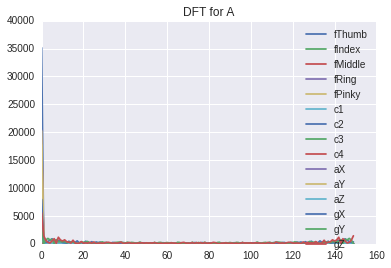

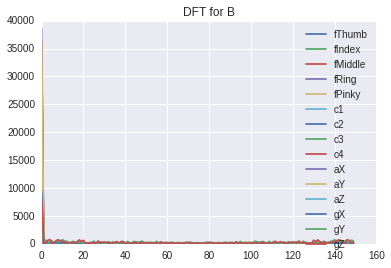

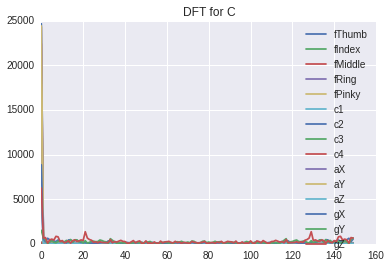

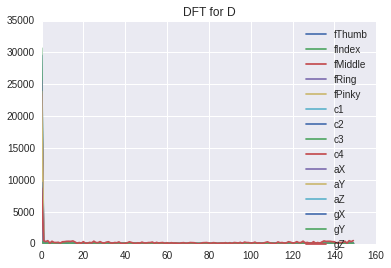

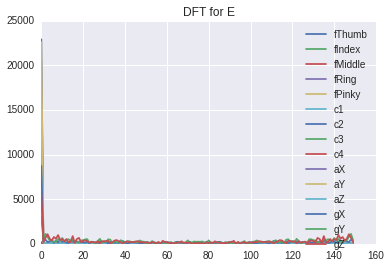

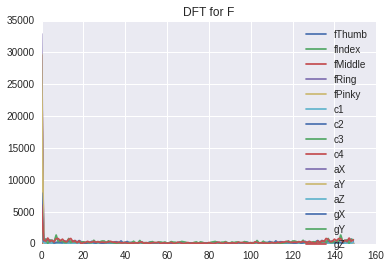

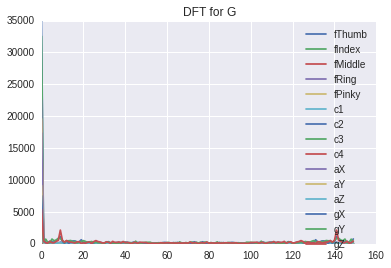

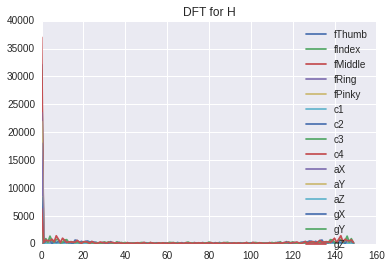

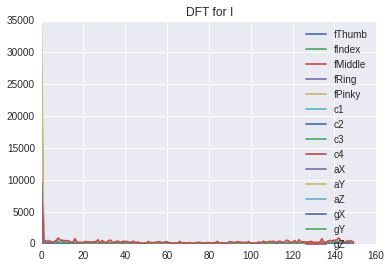

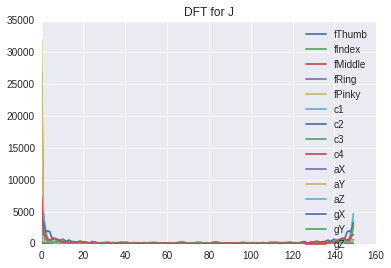

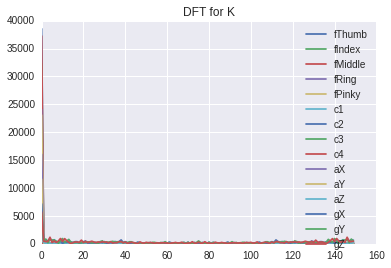

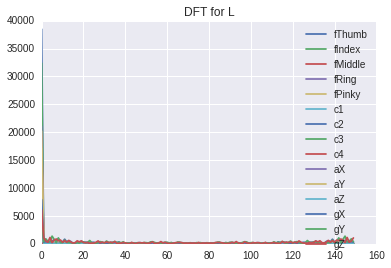

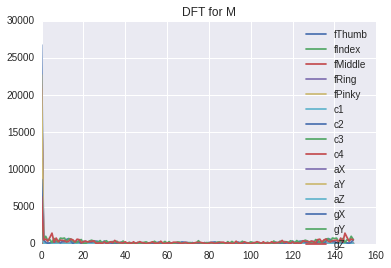

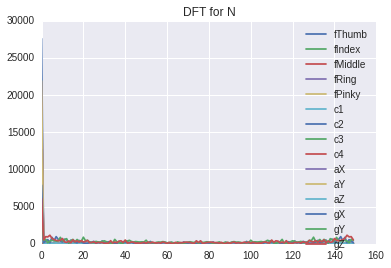

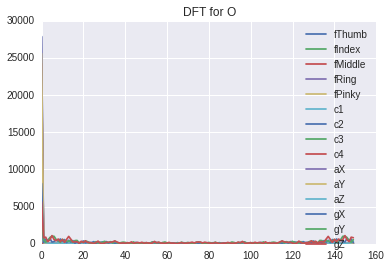

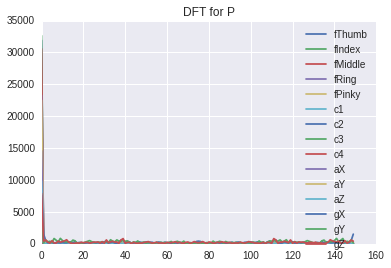

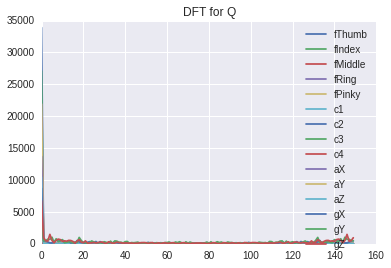

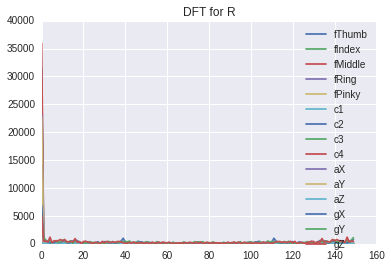

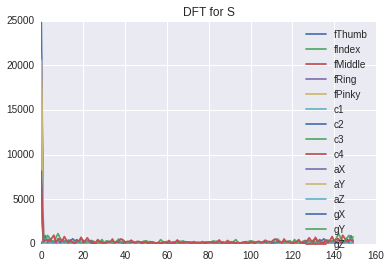

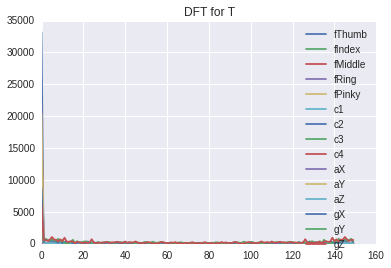

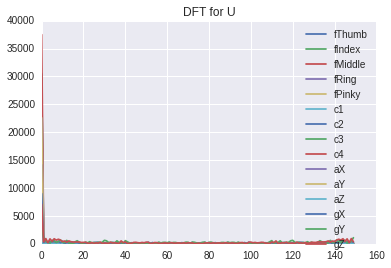

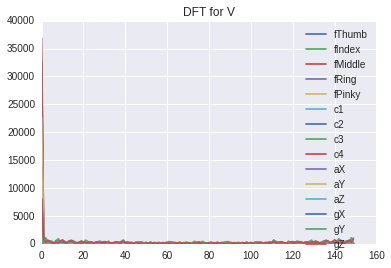

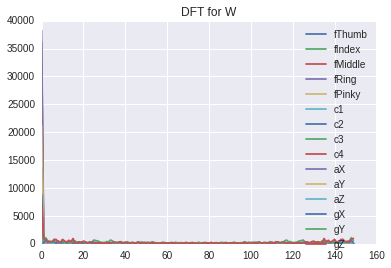

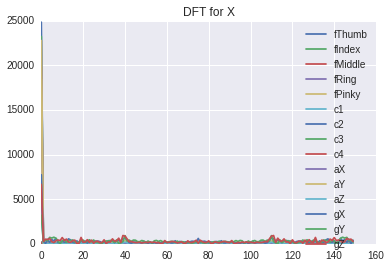

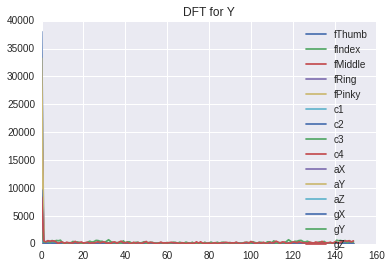

In [11]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn
import string

feature_names = ['fThumb', 'fIndex', 'fMiddle', 'fRing', 'fPinky', 'c1', 'c2', 'c3', 'c4', 'aX', 'aY', 'aZ', 'gX', 'gY', 'gZ', 'label']
target_names = [i for i in string.ascii_uppercase]
df = pd.read_csv("log.csv", names=feature_names)


def dft(column, i, j):
    global dft_vector 
    dft_vector = np.empty(0)
    col_size = len(column)
    for k in range(col_size):
        dft = 0
        for n in range(col_size):
            dft += column[n] * complex(np.cos(-2 * k * n * np.pi/col_size), np.sin(-2 * k * n * np.pi/col_size))
        dft_vector = np.append(dft_vector, dft)
        
    mag = [np.absolute(i) for i in dft_vector]
    plot(mag,label=feature_names[j-1])
    title("DFT for " + target_names[i-1])
    legend(loc='upper right')
    
for i in range(1,len(target_names)):
    for j in range(1,df.columns.size):
        dft(df.iloc[150*(i-1):150*i,j-1:j].values, i, j)
    figure()
    
# zero out high frequency entries
# inverse

/home/jerelynco/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


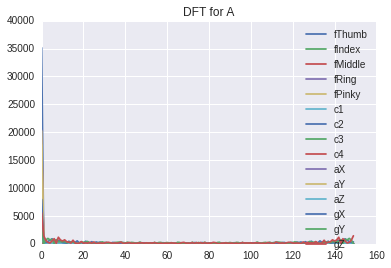

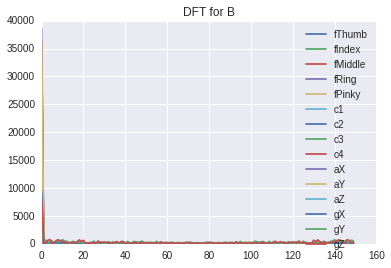

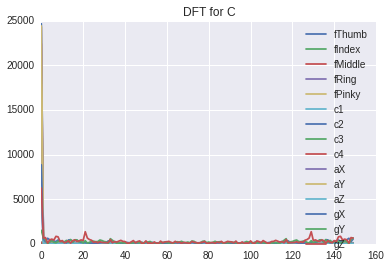

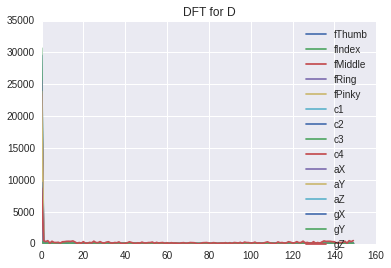

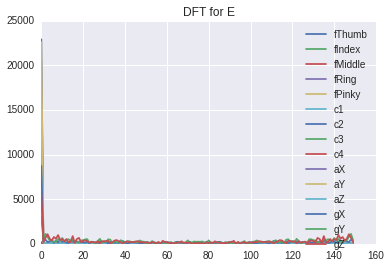

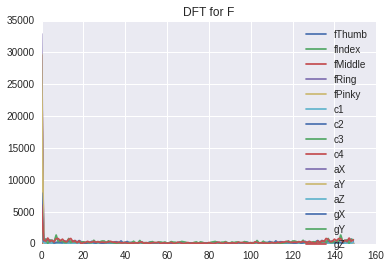

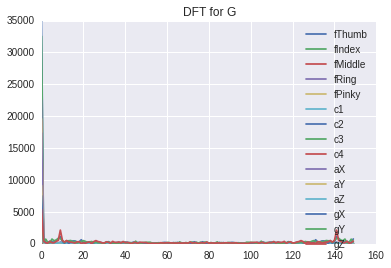

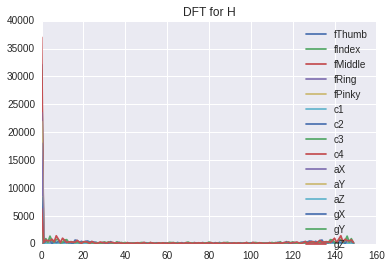

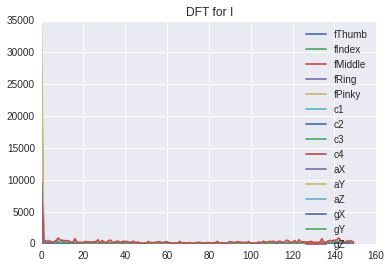

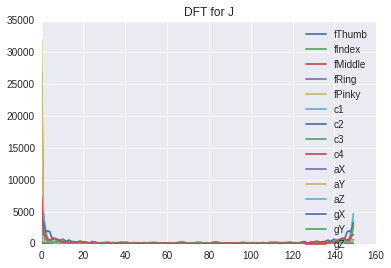

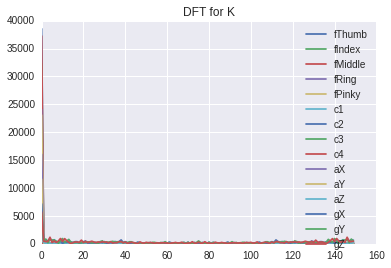

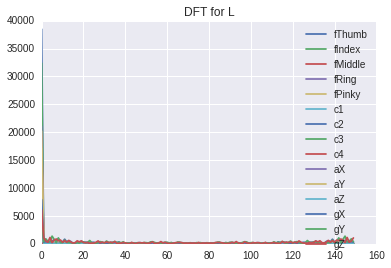

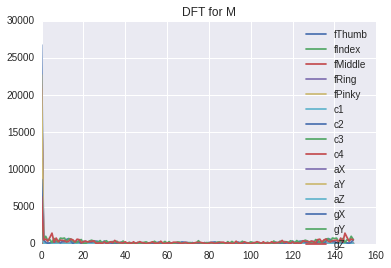

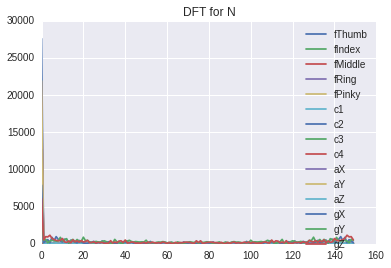

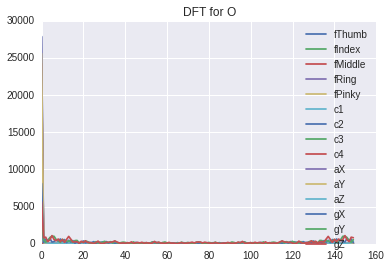

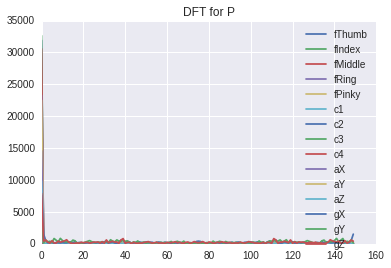

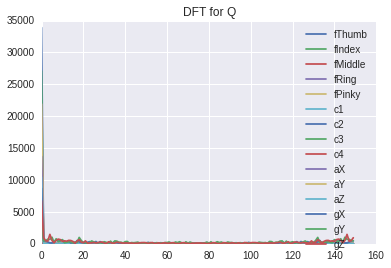

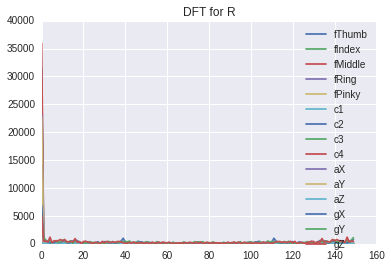

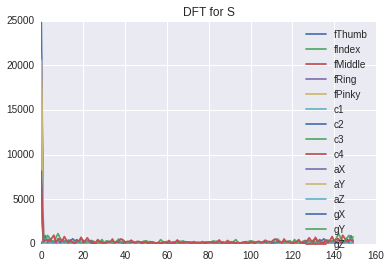

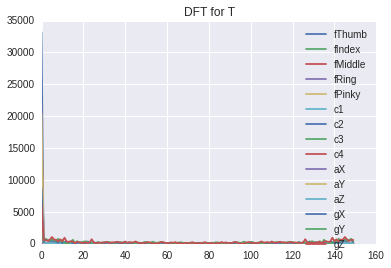

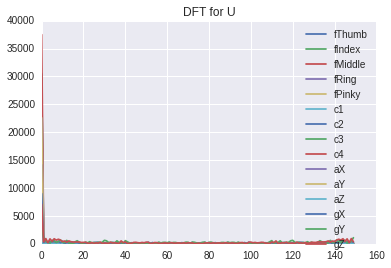

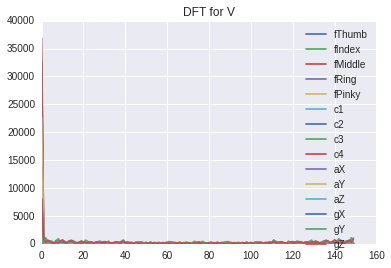

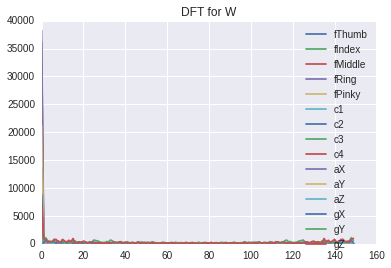

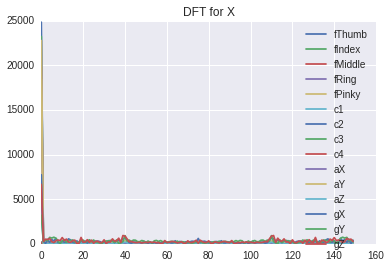

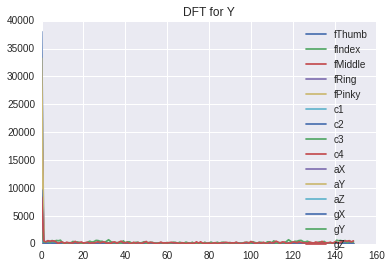

In [13]:
def dft_def(dft_vector, i, j):
    mag = [np.absolute(i) for i in dft_vector]
    plot(mag, label=feature_names[j-1])
    title("DFT for " + target_names[i-1])
    legend(loc='upper right')

for i in range(1,len(target_names)):
    for j in range(1,df.columns.size):
        dft_def(np.fft.fft(np.array(df.iloc[150*(i-1):150*i,j-1:j].values).reshape((1,150))[0]), i, j)
    figure()


In [8]:
np.fft.fft([1,4,5,5])

array([ 15.+0.j,  -4.+1.j,  -3.+0.j,  -4.-1.j])

In [14]:
df

,fThumb,fIndex,fMiddle,fRing,fPinky,c1,c2,c3,c4,aX,aY,aZ,gX,gY,gZ,label
0,232,101,122,134,135,0,1,1,1,30,120,37,9,2,8,A
1,236,103,123,136,134,0,1,1,1,28,117,33,9,2,7,A
2,232,100,124,135,132,0,1,1,1,24,119,34,8,2,7,A
3,235,103,125,134,134,0,1,1,1,27,120,33,67,56,9,A
4,233,103,124,136,132,0,1,1,1,30,120,35,65,52,11,A
5,236,103,125,137,136,0,1,1,1,31,118,37,63,52,11,A
6,233,104,122,134,132,0,1,1,1,27,121,37,63,54,9,A
7,233,103,124,134,137,0,1,1,1,28,119,38,63,55,10,A
8,232,102,123,136,135,0,1,1,1,30,119,36,64,56,10,A
9,235,102,124,134,132,0,1,1,1,31,118,37,64,58,10,A
